In [1]:
import requests
from bs4 import BeautifulSoup
import lxml

In [2]:
import requests
from bs4 import BeautifulSoup
import re
url = 'https://en.wikipedia.org/wiki/FIFA_World_Cup'
response = requests.get(url)


soup = BeautifulSoup(response.text, 'html.parser')


content_div = soup.find('div', {'id': 'mw-content-text'})

paragraphs = content_div.find_all('p')
main_content = ' '.join([para.get_text() for para in paragraphs])


main_content = re.sub(r'&[a-zA-Z]+;', ' ', main_content)  


main_content = main_content.replace(u'\xa0', ' ')


main_content = re.sub(r'[\r\n\t]+', ' ', main_content)  
main_content = re.sub(r'\s+', ' ', main_content) 


cleaned_content = main_content.strip()
print(cleaned_content[:1000])

The FIFA World Cup, often called the World Cup, is an international association football competition among the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War. The reigning champions are Argentina, who won their third title at the 2022 tournament.[1] The contest starts with the qualification phase, which takes place over the preceding three years to determine which teams qualify for the tournament phase. In the tournament phase, 32 teams compete for the title at venues within the host nation(s) over the course of about a month. The host nation(s) automatically qualify for the group stage of the tournament. The competition is scheduled to expand to 48 teams, starting with the 2026 tournament. As of the 2022 FIFA World Cup, 22 final tournaments ha

In [3]:
import spacy
from spacy import displacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(cleaned_content)

In [4]:
#most frequent words

from collections import Counter
words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

word_freq = Counter(words)

word_freq.most_common(10)

[('world', 139),
 ('cup', 98),
 ('fifa', 81),
 ('teams', 55),
 ('tournament', 52),
 ('football', 34),
 ('won', 26),
 ('south', 25),
 ('brazil', 24),
 ('host', 22)]

In [5]:
#individual sentences

sentences = [sent.text for sent in doc.sents]

for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}")


Sentence 1: The FIFA World Cup, often called the World Cup, is an international association football competition among the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body.
Sentence 2: The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War.
Sentence 3: The reigning champions are Argentina, who won their third title at the 2022 tournament.[1]
Sentence 4: The contest starts with the qualification phase, which takes place over the preceding three years to determine which teams qualify for the tournament phase.
Sentence 5: In the tournament phase, 32 teams compete for the title at venues within the host nation(s) over the course of about a month.
Sentence 6: The host nation(s) automatically qualify for the group stage of the tournament.
Sentence 7: The competition is scheduled to expand to 48 teams, start

In [6]:
print(sentences[1])

The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War.


In [6]:
#print only first 20 sentences

for sentence in sentences[0:20]:
    print(sentence)

The FIFA World Cup, often called the World Cup, is an international association football competition among the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body.
The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War.
The reigning champions are Argentina, who won their third title at the 2022 tournament.[1]
The contest starts with the qualification phase, which takes place over the preceding three years to determine which teams qualify for the tournament phase.
In the tournament phase, 32 teams compete for the title at venues within the host nation(s) over the course of about a month.
The host nation(s) automatically qualify for the group stage of the tournament.
The competition is scheduled to expand to 48 teams, starting with the 2026 tournament.
As of the 2022 FIFA World Cup, 22 final tournaments ha

In [17]:
#create a dataframe from 20 sentences

import pandas as pd

first_20 = sentences[0:20]

df_s = pd.DataFrame(first_20, columns=['Sentence'])
df_s.head()


,Sentence
0,"The FIFA World Cup, often called the World Cup..."
1,The tournament has been held every four years ...
2,"The reigning champions are Argentina, who won ..."
3,The contest starts with the qualification phas...
4,"In the tournament phase, 32 teams compete for ..."


In [11]:
#Finding the most common words in 10 topics

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df_s['Sentence'])

from sklearn.decomposition import NMF
nmf_model = NMF(n_components=10,random_state=42)
nmf_model.fit(dtm)

NMF(n_components=10, random_state=42)

In [13]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['olympics', 'summer', 'sport', 'fifa', '1906', '1904', 'football', 'olympic', 'international', 'official']


THE TOP 10 WORDS FOR TOPIC #1
['1904', 'games', 'hosted', 'teams', 'title', 'phase', 'tournament', 'qualify', 'host', 'nation']


THE TOP 10 WORDS FOR TOPIC #2
['national', 'hosted', 'held', '1930', 'fifa', 'event', 'final', '2022', 'cup', 'world']


THE TOP 10 WORDS FOR TOPIC #3
['football', 'england', '2022', 'amateur', 'team', 'medals', 'teams', 'trophy', 'national', 'won']


THE TOP 10 WORDS FOR TOPIC #4
['match', 'world', 'tournament', 'cup', 'won', '2022', 'england', 'inaugural', 'title', 'argentina']


THE TOP 10 WORDS FOR TOPIC #5
['global', 'fifa', 'event', 'competition', 'amateur', 'england', 'governing', 'body', 'association', 'football']


THE TOP 10 WORDS FOR TOPIC #6
['england', 'match', 'world', 'host', 'teams', 'games', 'hosted', 'competition', 'tournament', '2026']


THE TOP 10 WORDS FOR TOPIC #7
['inaugural', 'teams', 'held', 'qua

In [16]:
topic_results = nmf_model.transform(dtm)
topic_results.argmax(axis=1)

df_s['Topic'] = topic_results.argmax(axis=1)

df_s.head(10)

,Sentence,Topic
0,"The FIFA World Cup, often called the World Cup...",5
1,The tournament has been held every four years ...,7
2,"The reigning champions are Argentina, who won ...",4
3,The contest starts with the qualification phas...,7
4,"In the tournament phase, 32 teams compete for ...",1
5,The host nation(s) automatically qualify for t...,1
6,The competition is scheduled to expand to 48 t...,6
7,"As of the 2022 FIFA World Cup, 22 final tourna...",2
8,The trophy has been won by eight national teams.,3
9,"With five wins, Brazil is the only team to hav...",8


In [8]:
#noun chunks

for chunk in nlp(sentences[1]).noun_chunks:
    print(chunk)

The tournament
the inaugural tournament
the exception
the Second World War


In [9]:
#word instances
words_to_count = ['Lipton Trophy', 'Argentina', 'Brazil', 'World Cup', 'football']
counts = {word: sum(1 for sent in doc.sents if word.lower() in sent.text.lower()) for word in words_to_count}

print(counts)

{'Lipton Trophy': 1, 'Argentina': 9, 'Brazil': 21, 'World Cup': 89, 'football': 25}


In [10]:
doc1=nlp(sentences[1])

In [11]:
print(doc1.text)

The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War.


In [14]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            label_description = spacy.explain(ent.label_)
            print(f"{ent.text} - {ent.label_} - {label_description}")
    else:
        print('No entities found')

In [15]:
show_ents(doc1)

every four years - DATE - Absolute or relative dates or periods
1930 - DATE - Absolute or relative dates or periods
1942 - DATE - Absolute or relative dates or periods
1946 - DATE - Absolute or relative dates or periods
the Second World War - EVENT - Named hurricanes, battles, wars, sports events, etc.


In [16]:
print(doc1[4].text, doc1[4].pos_, doc1[4].tag_, spacy.explain(doc1[4].tag_))

held VERB VBN verb, past participle


In [17]:
show_ents(nlp(sentences[169]))

FIFA - ORG - Companies, agencies, institutions, etc.
$4.8 billion - MONEY - Monetary values, including unit
2014 - DATE - Absolute or relative dates or periods
$6.1 billion - MONEY - Monetary values, including unit
2018 - DATE - Absolute or relative dates or periods
1966 - DATE - Absolute or relative dates or periods


In [18]:
for token in list(doc.sents)[2]:
    print(f'{token.text:{12}} {token.pos_:{6}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The          DET    DT     determiner
reigning     VERB   VBG    verb, gerund or present participle
champions    NOUN   NNS    noun, plural
are          AUX    VBP    verb, non-3rd person singular present
Argentina    PROPN  NNP    noun, proper singular
,            PUNCT  ,      punctuation mark, comma
who          PRON   WP     wh-pronoun, personal
won          VERB   VBD    verb, past tense
their        PRON   PRP$   pronoun, possessive
third        ADJ    JJ     adjective (English), other noun-modifier (Chinese)
title        NOUN   NN     noun, singular or mass
at           ADP    IN     conjunction, subordinating or preposition
the          DET    DT     determiner
2022         NUM    CD     cardinal number
tournament.[1 NUM    CD     cardinal number
]            PUNCT  -RRB-  right round bracket


In [19]:
displacy.render(doc1, style='ent', jupyter=True)

Sentence before and after the first instance of the word 'Argentina'

In [20]:
target_index = None
for i, sentence in enumerate(sentences):
    if 'argentina' in sentence.lower():  
        target_index = i
        break

if target_index is not None:
   
    start = max(0, target_index - 1) 
    end = min(len(sentences), target_index + 2)  
    context = sentences[start:end]

    print("Context around the first occurrence of 'Argentina':\n")
    for sent in context:
        print(sent)

Context around the first occurrence of 'Argentina':

The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War.
The reigning champions are Argentina, who won their third title at the 2022 tournament.[1]
The contest starts with the qualification phase, which takes place over the preceding three years to determine which teams qualify for the tournament phase.


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for sentence in sentences[1:5]:  
    scores = analyzer.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Polarity Scores: {scores}")

Sentence: The tournament has been held every four years since the inaugural tournament in 1930, with the exception of 1942 and 1946 due to the Second World War.
Polarity Scores: {'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compound': -0.5994}
Sentence: The reigning champions are Argentina, who won their third title at the 2022 tournament.[1]
Polarity Scores: {'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.7964}
Sentence: The contest starts with the qualification phase, which takes place over the preceding three years to determine which teams qualify for the tournament phase.
Polarity Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence: In the tournament phase, 32 teams compete for the title at venues within the host nation(s) over the course of about a month.
Polarity Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [22]:
import pandas as pd

analyzer = SentimentIntensityAnalyzer()


output_data = []


for sentence in sentences: 
    scores['sentence'] = sentence
    scores = analyzer.polarity_scores(sentence) 
      
    output_data.append(scores)  


df_scores = pd.DataFrame(output_data)

print(df_scores)

      neg    neu    pos  compound  \
0    0.00  1.000  0.000    0.0000   
1    0.13  0.870  0.000   -0.5994   
2    0.00  0.628  0.372    0.7964   
3    0.00  1.000  0.000    0.0000   
4    0.00  1.000  0.000    0.0000   
..    ...    ...    ...       ...   
199  0.00  0.781  0.219    0.9042   
200  0.00  1.000  0.000    0.0000   
201  0.00  0.876  0.124    0.7501   
202  0.00  0.757  0.243    0.7717   
203  0.00  0.893  0.107    0.4588   

                                              sentence  
0    The tournament has been held every four years ...  
1    The reigning champions are Argentina, who won ...  
2    The contest starts with the qualification phas...  
3    In the tournament phase, 32 teams compete for ...  
4    The host nation(s) automatically qualify for t...  
..                                                 ...  
199  All World Cup-winning head coaches were native...  
200  Among the national teams, Brazil has played th...  
201  The two teams have played each other 

In [23]:
df_scores = df_scores[['sentence', 'neg', 'neu', 'pos', 'compound']] 
df_scores.head()

,sentence,neg,neu,pos,compound
0,The tournament has been held every four years ...,0.00,1.000,0.000,0.0000
1,"The reigning champions are Argentina, who won ...",0.13,0.870,0.000,-0.5994
2,The contest starts with the qualification phas...,0.00,0.628,0.372,0.7964
3,"In the tournament phase, 32 teams compete for ...",0.00,1.000,0.000,0.0000
4,The host nation(s) automatically qualify for t...,0.00,1.000,0.000,0.0000


In [24]:
df_scores['sentence'][2]

'The contest starts with the qualification phase, which takes place over the preceding three years to determine which teams qualify for the tournament phase.'

In [43]:
df_scores['final_score'] = df_scores['compound'].apply(lambda c: 'positive' if c > 0 else 'neutral' if c == 0 else 'negative')

df_scores.head()

,sentence,neg,neu,pos,compound,final_score
0,The tournament has been held every four years ...,0.00,1.000,0.000,0.0000,neutral
1,"The reigning champions are Argentina, who won ...",0.13,0.870,0.000,-0.5994,negative
2,The contest starts with the qualification phas...,0.00,0.628,0.372,0.7964,positive
3,"In the tournament phase, 32 teams compete for ...",0.00,1.000,0.000,0.0000,neutral
4,The host nation(s) automatically qualify for t...,0.00,1.000,0.000,0.0000,neutral


In [46]:
def review_rating(string):
    scores = analyzer.polarity_scores(string)
    if scores['compound'] == 0:
        return 'Neutral'
    elif scores['compound'] > 0:
        return 'Positive'
    else:
        return 'Negative'
    
while True:   
    user_input = input("Enter some text (or type 'stop' to quit): ")
    if user_input.lower() == 'stop':
        break
    s=review_rating(user_input)
    print(f"rating is:{s}")
    

Enter some text (or type 'stop' to quit): Indian celebrated diwali with fervour
rating is:Positive
Enter some text (or type 'stop' to quit): India and china are neighbours
rating is:Neutral
Enter some text (or type 'stop' to quit): stop


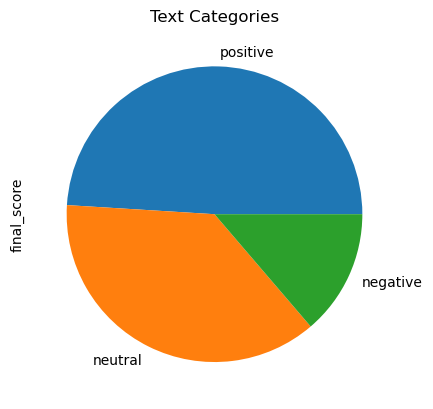

In [47]:
import matplotlib.pyplot as plt
df_scores['final_score'].value_counts().plot.pie()

plt.title("Text Categories")
plt.show()



Excercise

In [6]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [49]:
df['Positive'].value_counts()

1    15233
0     4767
Name: Positive, dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen=SentimentIntensityAnalyzer()

In [15]:
df['scores'] = df['reviewText'].apply(lambda review: sen.polarity_scores(review))

df.head()

,reviewText,Positive,scores
0,This is a one of the best apps acording to a b...,1,"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp..."
1,This is a pretty good version of the game for ...,1,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp..."
2,this is a really cool game. there are a bunch ...,1,"{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'comp..."
3,"This is a silly game and can be frustrating, b...",1,"{'neg': 0.062, 'neu': 0.41, 'pos': 0.528, 'com..."
4,This is a terrific game on any pad. Hrs of fun...,1,"{'neg': 0.0, 'neu': 0.478, 'pos': 0.522, 'comp..."


In [16]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,reviewText,Positive,scores,compound
0,This is a one of the best apps acording to a b...,1,"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp...",0.7717
1,This is a pretty good version of the game for ...,1,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.9325
2,this is a really cool game. there are a bunch ...,1,"{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'comp...",0.8687
3,"This is a silly game and can be frustrating, b...",1,"{'neg': 0.062, 'neu': 0.41, 'pos': 0.528, 'com...",0.9413
4,This is a terrific game on any pad. Hrs of fun...,1,"{'neg': 0.0, 'neu': 0.478, 'pos': 0.522, 'comp...",0.9552


In [17]:
df['comp_score'] = df['compound'].apply(lambda c: 1 if c >=0 else 0)

df.head()

,reviewText,Positive,scores,compound,comp_score
0,This is a one of the best apps acording to a b...,1,"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp...",0.7717,1
1,This is a pretty good version of the game for ...,1,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.9325,1
2,this is a really cool game. there are a bunch ...,1,"{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'comp...",0.8687,1
3,"This is a silly game and can be frustrating, b...",1,"{'neg': 0.062, 'neu': 0.41, 'pos': 0.528, 'com...",0.9413,1
4,This is a terrific game on any pad. Hrs of fun...,1,"{'neg': 0.0, 'neu': 0.478, 'pos': 0.522, 'comp...",0.9552,1


In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
accuracy_score(df['Positive'],df['comp_score'])

0.82175

In [20]:
print(classification_report(df['Positive'],df['comp_score']))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      4767
           1       0.86      0.92      0.89     15233

    accuracy                           0.82     20000
   macro avg       0.76      0.72      0.73     20000
weighted avg       0.81      0.82      0.81     20000



In [21]:
import pandas as pd
df2=pd.read_csv(r'C:\UNNI\Analytics\data\trial\nlp\chat_dataset.csv')

In [22]:
df2.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [24]:
df2.dropna(inplace=True)

In [25]:
df2['sentiment'].value_counts()

neutral     259
positive    178
negative    147
Name: sentiment, dtype: int64

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

In [28]:
df2['scores'] = df2['message'].apply(lambda review: sent.polarity_scores(review))

In [30]:
df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

In [31]:
df2['comp_score'] = df2['compound'].apply(lambda c: 'positive' if c > 0 else 'neutral' if c == 0 else 'negative')

df2.head()

,message,sentiment,scores,compound,comp_score
0,I really enjoyed the movie,positive,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.5563,positive
1,The food was terrible,negative,"{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'comp...",-0.4767,negative
2,I'm not sure how I feel about this,neutral,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",-0.2411,negative
3,The service was excellent,positive,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.5719,positive
4,I had a bad experience,negative,"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",-0.5423,negative


In [32]:
df2['comp_score'].value_counts()

positive    216
negative    201
neutral     167
Name: comp_score, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(df2['sentiment'],df2['comp_score'])

0.672945205479452

In [34]:
print(classification_report(df2['sentiment'],df2['comp_score']))

              precision    recall  f1-score   support

    negative       0.57      0.78      0.66       147
     neutral       0.73      0.47      0.57       259
    positive       0.72      0.88      0.79       178

    accuracy                           0.67       584
   macro avg       0.67      0.71      0.68       584
weighted avg       0.69      0.67      0.66       584



In [35]:
print(confusion_matrix(df2['sentiment'],df2['comp_score']))

[[115  25   7]
 [ 84 122  53]
 [  2  20 156]]
